# Machine Learning

We formulate coffee price prediction as a supervised regression problem.

In [22]:
X = panel_yearly[["avg_temp", "production_tons"]]
y = panel_yearly["coffee_price"]


In [23]:
# Reproducible split
panel_shuffled = panel_yearly.sample(frac=1, random_state=42)

split_idx = int(len(panel_shuffled) * 0.75)

train = panel_shuffled.iloc[:split_idx]
test  = panel_shuffled.iloc[split_idx:]

X_train = train[["avg_temp", "production_tons"]]
y_train = train["coffee_price"]

X_test = test[["avg_temp", "production_tons"]]
y_test = test["coffee_price"]


In [24]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_test_const  = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           coffee_price   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     5.590
Date:                Fri, 02 Jan 2026   Prob (F-statistic):            0.00594
Time:                        23:25:08   Log-Likelihood:                -343.91
No. Observations:                  63   AIC:                             693.8
Df Residuals:                      60   BIC:                             700.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             976.5597    287.798     

In [25]:
y_pred = model.predict(X_test_const)


In [26]:
import numpy as np

rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2 = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 37.05110846081796
R²: 0.299591298677206


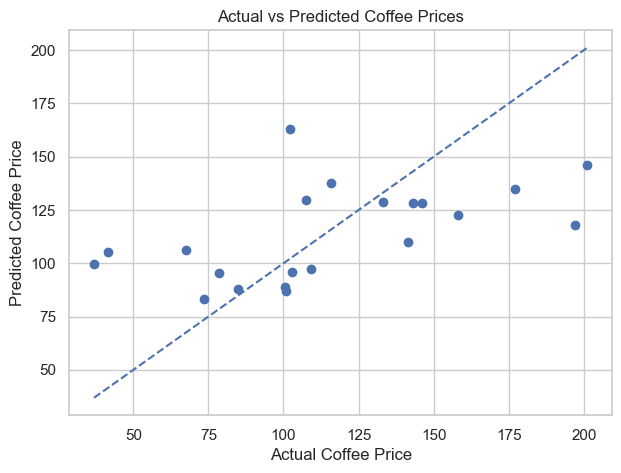

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")

plt.xlabel("Actual Coffee Price")
plt.ylabel("Predicted Coffee Price")
plt.title("Actual vs Predicted Coffee Prices")
plt.grid(True)
plt.show()


A supervised learning approach is applied using linear regression to predict coffee prices based on production volume and average temperature. The model is trained on 75% of the data and evaluated on the remaining 25%. Model performance is assessed using RMSE and R² metrics.